---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 1.4 Programación científica en Python </font>**
### **<font color="DodgerBlue"> Notebook 3: Métodos numéricos </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



## **Métodos numéricos**

Los métodos numéricos son un conjunto de algoritmos que en casi todos los casos usan una computadora para resolver problemas matemáticos planteados por la física, química, la biología o las ciencias de la Tierra. 

Se utilizan cuando el problema se vuelve demasiado laborioso para resolver a mano, o cuándo los problemas no son reales en estricto sentido. Por ejemplo, si uno obtiene un montón de datos de un dispositivo de medición que no siguen una forma analítica, o al menos no una forma analítica conocida.

> 1. Solución de sistemas de ecuaciones

Python y NumPy son herramientas fundamentales en la resolución de sistemas de ecuaciones lineales debido a su eficiencia, versatilidad y simplicidad. Python, como lenguaje de programación, proporciona una sintaxis clara y legible, facilitando la implementación de algoritmos matemáticos complejos. El objetivo de esta sección es resolver sistemas de ecuaciones utilizando NumPy que típicamente podríamos resolver con lápiz y papel para un número de variables y ecuaciones entre 2 y 4, pero ¿qué pasa si tenemos 10 o 14 ecuaciones? Para esto podemos utilizar una computadora, y en este caso Python, para aliviarnos la vida.

> 2. Integración numérica

 La integración numérica es crucial en situaciones donde no se puede obtener una solución analítica directa, y Python facilita la implementación de métodos numéricos para aproximar integrales definidas. NumPy ofrece funciones especializadas que simplifican la manipulación de datos y cálculos en el proceso de integración numérica. La capacidad de Python para manejar fácilmente funciones y su flexibilidad en la representación de ecuaciones hacen que sea una elección destacada para la implementación de algoritmos numéricos.

> 3. Diferencias finitas

Las diferencias finitas son una técnica matemática utilizada para aproximar soluciones a derivadas o ecuaciones diferenciales mediante la sustitución de derivadas por aproximaciones de diferencias que se calculan en intervalos finitos, en lugar de la definición formal que utiliza un continuo infinito de puntos. En esencia, implica discretizar el dominio continuo en una cuadrícula de puntos y aproximar las derivadas en esos puntos utilizando diferencias algebraicas y luego sumarlas.




In [5]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt

### Sistemas de ecuaciones lineales

La función `np.linalg.solve` en NumPy se utiliza para resolver sistemas de ecuaciones lineales representados en forma matricial. La función resuelve sistemas del tipo $Ax=B$, donde $A$ es una matriz de coeficientes, $x$ es el vector de incógnitas que queremos encontrar y $B$ es el vector de términos constantes.

La sintaxis básica de `np.linalg.solve` es la siguiente:

```
numpy.linalg.solve(a, b)
```

Donde:

  a: Es la matriz de coeficientes $A$.

  b: Es el vector de términos constantes $B$.

Por ejemplo, para el sistema de ecuaciones:

\begin{align}
3x+2y = 11 \\
2x-y =3
\end{align}

Podemos resolverlo a mano en clase (*el profe lo hace*) y obtiene $x=2$ y $y=1$.

In [6]:
# Definir el sistema de ecuaciones lineales en forma matricial (Ax = B)
A = np.array([[3, 2], [2, -1]])
B = np.array([11, 3])

# Utilizar la función solve de NumPy para encontrar la solución x
solucion = np.linalg.solve(A, B)

# Imprimir la solución
print("La solución del sistema de ecuaciones es:")
print("x =", int(solucion[0]))
print("y =", int(solucion[1]))

La solución del sistema de ecuaciones es:
x = 2
y = 1


Para un sistema un poquito más difícil:

\begin{align}
2x+y = 8 \\
x-3y = 1
\end{align}

Podemos resolverlo a mano y en Python:

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 9 - Sistema de ecuaciones </font>**

<font color="DarkBlue"> Resolver el sistema de ecuaciones anterior (1) a mano y en NumPy e imprimir ambas soluciones mostrando que son iguales.

---



In [7]:
# Definir el sistema de ecuaciones lineales en forma matricial (Ax = B)
A = np.array([[2, 1], [1, -3]])
B = np.array([8, 1])

# Utilizar la función solve de NumPy para encontrar la solución x
solucion_numpy = np.linalg.solve(A, B)

# Imprimir la solución obtenida manualmente y la solución de NumPy
print("Solución manual:", [25/7,6/7])
print("Solución NumPy:", solucion_numpy)


Solución manual: [3.5714285714285716, 0.8571428571428571]
Solución NumPy: [3.57142857 0.85714286]


### Integración numérica

La integración numérica es esencial en Ciencias de la Tierra debido a la naturaleza frecuentemente compleja de los conjuntos de datos geofísicos y geoespaciales. En campos como la hidrología, la meteorología y la geofísica, se encuentran datos que representan fenómenos continuos y variaciones espacio-temporales. La capacidad de calcular áreas bajo curvas, volumen de terrenos, o flujos de datos a lo largo del tiempo, es crucial para entender y modelar fenómenos geofísicos. Python, con sus bibliotecas numéricas como *NumPy* y *SciPy*, proporciona herramientas poderosas para realizar integración numérica de manera eficiente y precisa. Estas técnicas permiten la $\textbf{aproximación}$ de integrales definidas y son fundamentales en la resolución de ecuaciones diferenciales que modelan fenómenos geofísicos complejos.

Una integral es una suma infinita de números por lo que una integral numérica es una aproximación de la suma infinita a través de una suma finita.

Regresemos a las clases de preparatoria donde la integral es el área bajo la curva. En particular,

\begin{align}
A=\int_a^b f(x)\, dx
\end{align}

es el área de la función $f(x)$ entre $a$ y $b$.

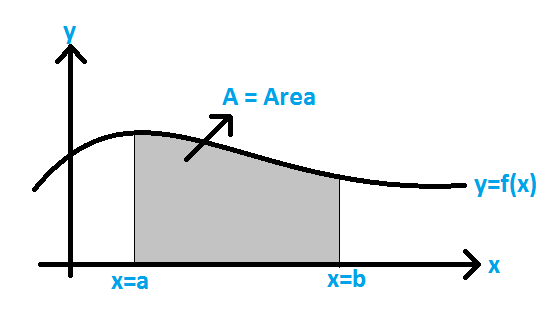

Uno de los métodos fundamentales de integración numérica es el método de los trapecios, que aproxima la integral definida dividiendo el área bajo una curva en múltiples trapecios y sumando sus áreas individuales.
Por ejemplo, para en la figura siguiente vemos de qué se trata este método y cómo se aproxima el área bajo la curva.

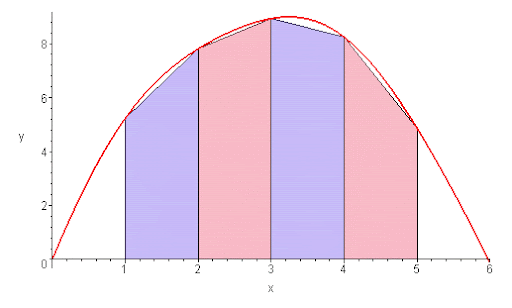

Vemos que si utilizamos un trapecio el espacio en blanco, donde nuestra aproximación falla, se vuelve más pequeño.


Como ejemplo, supongamos que queremos calcular la integral definida de la función $f(x)=x^2$ en el intervalo $[0,1]$. Podemos utilizar la regla del trapecio para este propósito y NumPy. El método de los trapecios es simple de entender y aplicar, especialmente para funciones continuas, y su implementación en *NumPy* es sencilla a través de la función `np.trapz` que toma como argumentos primero a $f(x)$ y luego al vector $x$.



In [8]:
# Definir la función a integrar
def f(x):
    return x**2

# Definir el intervalo de integración
a, b = -1, 1

# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)

# Aplicar la regla del trapecio para la integración numérica, np.trapz(f(x),x)
integral_result = np.trapz(y_values, x=x_values)

# Imprimir el resultado
print("El resultado de la integración numérica es:", integral_result)

El resultado de la integración numérica es: 0.6666680026706719


Podemos integrar la función analíticamente y demostrar que

\begin{align}
\int_{-1}^1 f(x) dx=\int_{-1}^1 x^2 dx = \frac{x^3}{3}\bigg\rvert_{-1}^1 = \frac{2}{3}
\end{align}

lo cual coincide perfectamente con el resultado.

Pero, ¿qué fue lo que hicimos? El método de los trapecios aproxima la función a través de una línea entre cada vértica de los trapecios. Para esto, calcula la línea recta entre cada par de puntos $(a,b)$ de manera que la integral en cada intervalo se puede escribir como:

\begin{align}
\int_a^b f(x) dx \approx (b-a) \frac{f(a)+f(b)}{2}
\end{align}

Es decir, utiliza el valor de la función al principio y al final de cada trapecio para aproximar el valor del área bajo la curva. Si tuviéramos $n$ trapecios, entonces podemos sumar el valor del área de todos ellos y obtener un resultado más preciso, que depende de la *resolución* o número de trapecios. A mayor $n$, mejor será nuestra aproximación.

La fórmula de método de trapecios para $y=f(x)$ y $n$ trapecios es:

\begin{align}
\int_a^b f(x) dx \approx \frac{(b-a)}{n} \bigg[ \frac{y(a)+y(b)}{2} + \sum_{k=1}^n y(a +k \frac{b-a}{n}) \bigg]
\end{align}

donde $\sum_{k=1}^n y(a +k \frac{b-a}{n}) $ representa la suma de la función evaluada en cada vértice de los trapecios. Vamos a ver si graficando nos queda más claro.

Podemos, además, hacer nuestra propia función para calcular una integral con este método, que se puede escribir como:

In [9]:
# Método de trapecios manual para n trapecios
def trapecios(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    # y = f(x)
    y = func(x)
    h = (b - a) / n
    resultado = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return x,y,resultado

Podemos utilizar esta función para mostrar qué fue lo que hicmos gráficamente en el ejemplo anterior:

Resultado aproximado con 6 trapecios
0.7037037037037037
Resultado de numpy trapz
0.6666680026706719


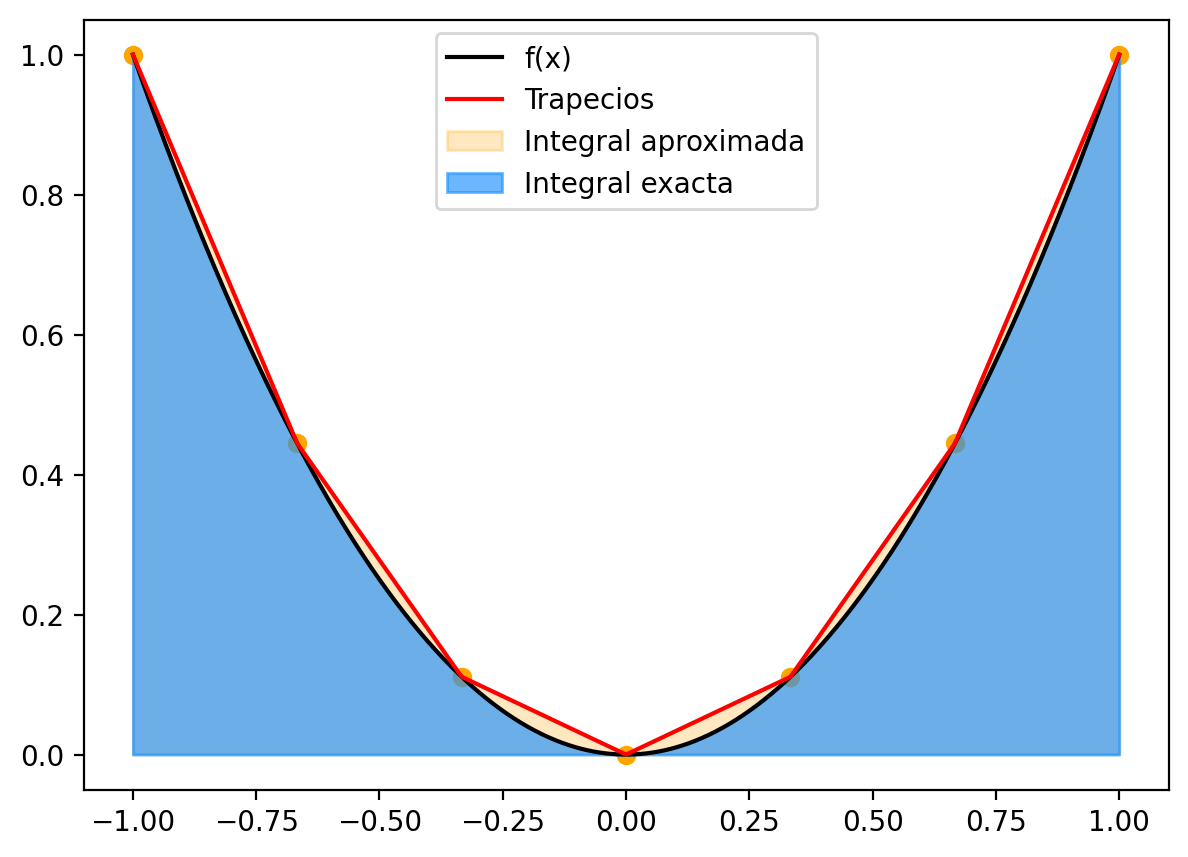

In [10]:
# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)
xs,ys,resultado=trapecios(f,-1,1,6)
print('Resultado aproximado con 6 trapecios')
print(resultado)
print('Resultado de numpy trapz')
print(np.trapz(y_values,x_values))

plt.figure(figsize=(7,5),dpi=200)
plt.plot(x_values,y_values,c='k',label='f(x)')
plt.plot(xs,ys,c='red',label='Trapecios')
plt.scatter(xs,ys,c='orange')
plt.fill_between(xs,ys,color='orange',alpha=0.25,label='Integral aproximada')
plt.fill_between(x_values,y_values,color='dodgerblue',alpha=0.65,label='Integral exacta')

plt.legend()

Resultado aproximado con 10 trapecios
-3.885780586188048e-17
Resultado de numpy trapz
0.6666680026706719


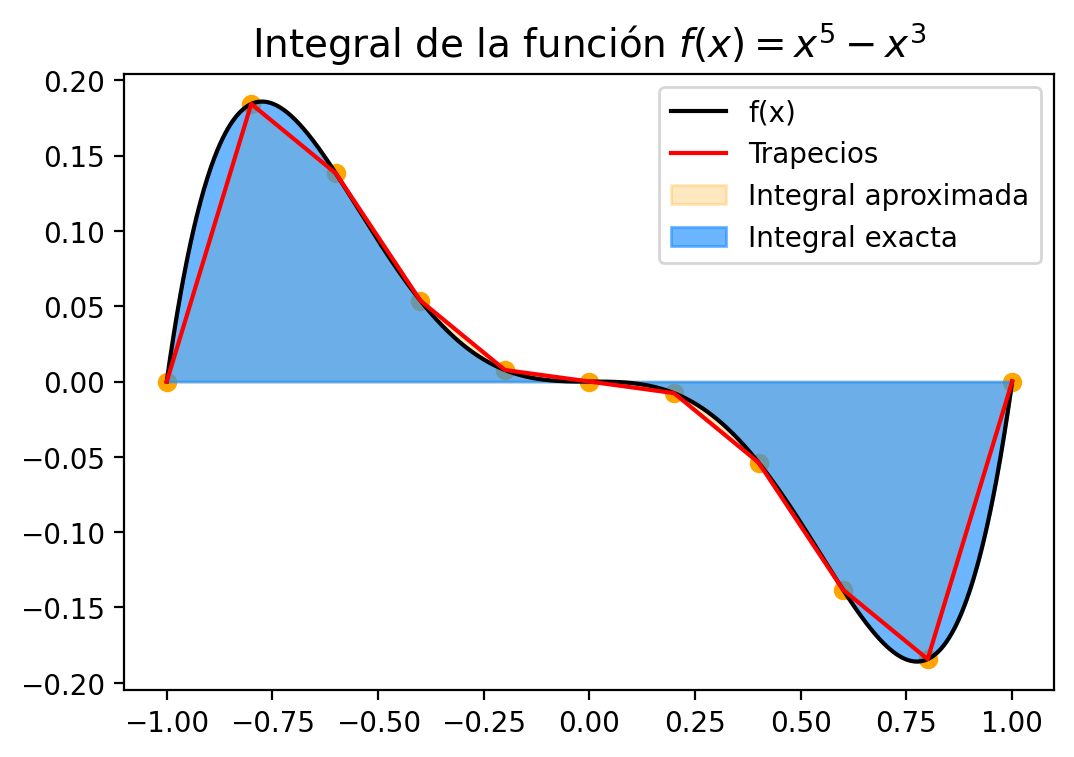

In [11]:
def f(x):
    return x**5-x**3
xs,ys,resultado=trapecios(f,-1,1,10)
print('Resultado aproximado con 10 trapecios')
print(resultado)

print('Resultado de numpy trapz')
print(np.trapz(y_values,x_values))


# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)

plt.figure(figsize=(6,4),dpi=200)
plt.plot(x_values,y_values,c='k',label='f(x)')
plt.plot(xs,ys,c='red',label='Trapecios')
plt.scatter(xs,ys,c='orange')
plt.fill_between(xs,ys,color='orange',alpha=0.25,label='Integral aproximada')
plt.fill_between(x_values,y_values,color='dodgerblue',alpha=0.65,label='Integral exacta')
plt.title('Integral de la función $f(x)=x^5-x^3$',fontsize=14)
plt.legend()

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 10 - Integración </font>**

<font color="DarkBlue"> 1. Repita el ejercicio anterior pero utilizando el método de trapecios con 25 intervalos o 25 trapecios, muestre la gráfica y además imprima el valor exacto de la diferencia entre el resultado de la función de numpy y el resultado del método manual.

<font color="DarkBlue"> 2. Integre numéricamente la función $f(x)=x^3-2x^2+1$ utilizando el método de trapecios con la función de NumPy y la función explícita que escribimos abajo para $n=$5, 15 y 25 en el intervalo $[-2,2]$.

---


### Introducción a la Modelación Numérica


Una ecuación diferencial es una ecuación que involucra una función desconocida y una o más de sus derivadas. Estas ecuaciones describen relaciones entre una función y sus derivadas en una o más variables independientes. Las ecuaciones diferenciales se utilizan ampliamente en física, ingeniería, ciencias de la computación, economía y otras disciplinas para modelar fenómenos naturales y procesos dinámicos.

Existen dos tipos principales de ecuaciones diferenciales:

1. **Ecuaciones Diferenciales Ordinarias (ODEs)**: Estas ecuaciones involucran una función desconocida de una variable independiente. Por ejemplo, $ \frac{{dy}}{{dx}} = f(x, y) $ es una ecuación diferencial ordinaria, donde $y$ es la función desconocida de $x$.

2. **Ecuaciones en Derivadas Parciales (PDEs)**: Estas ecuaciones involucran una función desconocida de varias variables independientes y sus derivadas parciales. Por ejemplo, la ecuación de difusión $ \frac{{\partial u}}{{\partial t}} = D \frac{{\partial^2 u}}{{\partial x^2}} $ es una ecuación en derivadas parciales, donde $u(x, t)$ es la función desconocida.

Los métodos numéricos se utilizan para resolver ecuaciones diferenciales cuando no es posible encontrar una solución analítica (es decir, una expresión algebraica que representa la solución exacta). Esto puede deberse a la complejidad de la ecuación, la falta de métodos analíticos disponibles o la necesidad de encontrar soluciones en casos generales o específicos.

En el ámbito de las **Ciencias de la Tierra**, las ecuaciones diferenciales desempeñan un papel fundamental en la comprensión y modelado de una amplia gama de procesos naturales. Desde la dinámica atmosférica y oceánica hasta la evolución geológica y la interacción entre la biosfera y los sistemas climáticos, las ecuaciones diferenciales se utilizan para describir fenómenos como el flujo de fluidos, la transferencia de calor, la propagación de ondas sísmicas y la dinámica de poblaciones. 

Modelos famosos como el _modelo depredador-presa_ y el _modelo de clima de Lorenz_ son algunos ejemplos de modelos con ecuaciones diferenciales que fueron cruciales en nuestra comprensión de fenómenos estudiados por los científicos de la Tierra. En este contexto, los métodos numéricos son esenciales para resolver ecuaciones diferenciales que gobiernan estos procesos complejos, permitiendo a los científicos simular y predecir el comportamiento de la Tierra y sus sistemas ambientales en diferentes escalas espaciales y temporales. Estas simulaciones numéricas proporcionan información crucial para abordar desafíos ambientales, como el cambio climático, la gestión de recursos naturales y la mitigación de riesgos naturales, lo que contribuye a una comprensión más profunda y holística de nuestro planeta y su entorno dinámico.

Algunas razones por las que se utilizan métodos numéricos para resolver ecuaciones diferenciales incluyen:

1. **Flexibilidad**: Los métodos numéricos pueden adaptarse para resolver una amplia variedad de ecuaciones diferenciales, incluidas aquellas para las cuales no existen soluciones analíticas conocidas.

2. **Eficiencia computacional**: Algoritmos numéricos eficientes pueden calcular soluciones aproximadas en un tiempo razonable, incluso para problemas complejos o con dimensiones altas.

3. **Precisión controlada**: La precisión de la solución numérica puede controlarse ajustando el tamaño de los pasos de integración o la precisión de la aproximación.

4. **Aplicabilidad a problemas reales**: Muchos problemas del mundo real, especialmente en ciencias de la ingeniería y la física, pueden modelarse mediante ecuaciones diferenciales. Los métodos numéricos permiten resolver estos modelos para obtener información práctica.

En resumen, los métodos numéricos son herramientas poderosas y versátiles para resolver ecuaciones diferenciales en una variedad de contextos científicos y de ingeniería donde las soluciones analíticas no son viables o están fuera de alcance.

### Diferencias finitas

Dos conceptos clave cuando queremos resolver una ecuación diferencial es 

- Discretización: El dominio continuo sobre el cual está definida la ecuación diferencial se discretiza en una cuadrícula de puntos. Esta cuadrícula puede ser unidimensional, bidimensional o tridimensional, dependiendo de la naturaleza del problema.

- Aproximación de Derivadas: En lugar de calcular derivadas analíticamente, los métodos de diferencias finitas aproximan las derivadas utilizando los valores de la función en los puntos vecinos de la cuadrícula. Existen diferentes esquemas de diferencias finitas para aproximar derivadas de primer orden, segundo orden y de orden superior.
---
<a name='ej-1'></a>
#### **<font color="OrangeRed">Ejemplo </font>**

---

En este caso, resolveremos la ecuación de primer orden:
\begin{align}
\frac{dy}{dt}=−ky
\end{align}

donde $y$ es una función de $t$ y $k$ es una constante.

Este es un ejemplo básico de una ecuación diferencial ordinaria que describe la tasa de cambio de una variable $y$ en función del tiempo $t$.
    
Pero para poder entenderla, es útil pensar en dos ecuaciones diferenciales:
 
 \begin{align}
         \frac{dy}{dt}=t
 \end{align}

 \begin{align}
     \frac{dy}{dt}=y
 \end{align}
 
 ¿Cuál es la diferencia entre estas dos ecuaciones?
 
La diferencia entre las ecuaciones $ \frac{dy}{dt}=t$ $\frac{dy}{dt}=y$ radica en cómo se comporta la variable dependiente $y$ en relación con la variable independiente $t$.

   - $ \frac{dy}{dt}=t$ :
        Esta ecuación implica que la tasa de cambio de $y$ con respecto al tiempo $t$ es igual a la variable independiente $t$ en sí misma.
        
        La solución de esta ecuación diferencial ordinaria (ODE) sería una función de la forma $y(t)=\frac{t^2}{2}+C$, donde $C$ es una constante de integración.
        
        En otras palabras, la tasa a la que $y$ cambia está determinada por la función lineal $t$.

- $\frac{dy}{dt}=y$ :
       En esta ecuación, la tasa de cambio de $y$ con respecto al tiempo $t$ es proporcional a $y$ mismo.
        
    La solución de esta ecuación diferencial ordinaria (ODE) es una función exponencial, $y(t)=Ce^{t}$, donde $C$ es una constante de integración.
    
    Aquí, la tasa de cambio de $y$ en cualquier momento $t$ es proporcional a $y$ en ese momento.

En resumen, la principal diferencia radica en cómo se relaciona la tasa de cambio de la variable dependiente $y$ con la variable independiente $t$ en cada ecuación. En el primer caso, la tasa de cambio depende linealmente de $t$, mientras que en el segundo caso, la tasa de cambio es proporcional a $y$ mismo.

En todos estos casos, vemos problemas de valores de condición inicial. Es decir, necesitamos saber cuál es el valor de la función en algún punto. 

#### El método de diferencias finitas 

Este método aproxima una derivada a través de evaluar una función en pequeños pedazos discretos separados por un intervalo $h$.

\begin{align}
f'(x_0)\approx \frac{f(x_0+h)-f(x_o)}{h}
\end{align}


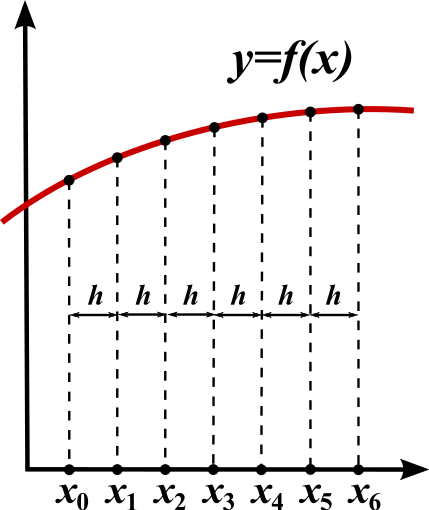

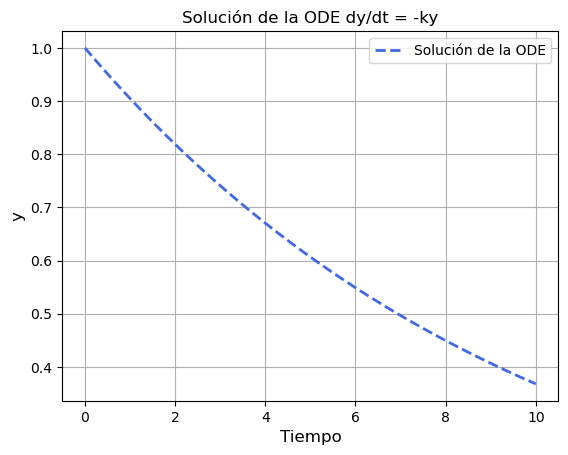

In [12]:
# Parámetros
k = 0.1  # Constante de proporcionalidad
T = 10.0  # Tiempo total
Nt = 1000  # Número de pasos de tiempo
dt = T / Nt  # Tamaño del paso temporal

# Condiciones iniciales
y0 = 1.0  # Valor inicial de y
t_values = np.linspace(0, T, Nt)
y_values = np.zeros(Nt)
y_values[0] = y0

# Esquema de diferencias finitas para ODE
for n in range(Nt - 1):
    y_values[n + 1] = y_values[n] + dt * (-k * y_values[n])

# Visualización de la solución
plt.plot(t_values, y_values, c='royalblue',linewidth=2,linestyle='--',label='Solución de la ODE')
plt.xlabel('Tiempo',fontsize=12)
plt.ylabel('y',fontsize=12)
plt.title('Solución de la ODE dy/dt = -ky')
plt.legend()
plt.grid(True)
plt.show()


---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 11 - Ec. diferencial 1 </font>**

<font color="DarkBlue"> 1. Resuelva la ecuación diferencial  \begin{align}
     \frac{dy}{dt}=y
 \end{align} con condición inicial $y(0)=0.1$ utilizando el método de diferencias finitas. 


---


#### Método de Euler

El método de Euler es uno de los métodos numéricos más simples para resolver ODEs. Se basa en la aproximación de la derivada de una función mediante la pendiente de la tangente en un punto dado. El método de Euler es fácil de implementar y entender, pero puede ser inestable para ciertas ODEs y puede requerir pasos de tiempo muy pequeños para garantizar precisión.

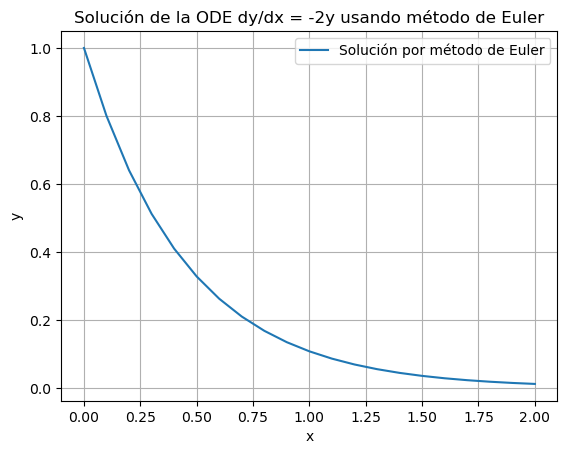

In [13]:
# Definición de la ecuación diferencial: dy/dx = -2y
def f(x, y,k=2):
    return -k * y

# Parámetros
x0 = 0  # Valor inicial de x
y0 = 1  # Valor inicial de y
h = 0.1  # Tamaño del paso

# Inicialización de listas para almacenar los valores de x e y
x_values = [x0]
y_values = [y0]

# Método de Euler
x = x0
y = y0
while x < 2:
    y = y + h * f(x, y)
    x += h
    x_values.append(x)
    y_values.append(y)

# Visualización de la solución
plt.plot(x_values, y_values, label='Solución por método de Euler')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solución de la ODE dy/dx = -2y usando método de Euler')
plt.legend()
plt.grid(True)
plt.show()

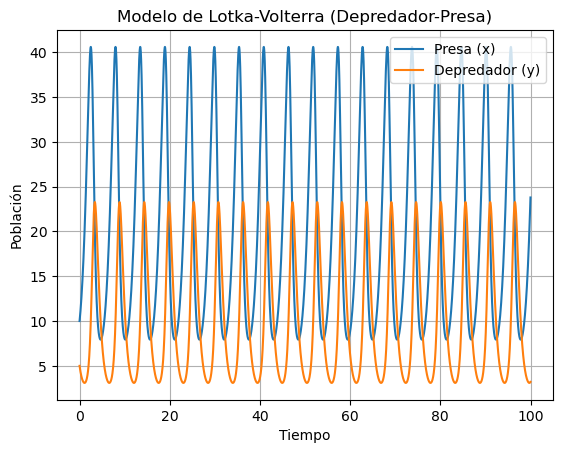

In [14]:
# Definición de las ecuaciones diferenciales del modelo Lotka-Volterra
def lotka_volterra(t, state, alpha, beta, gamma, delta):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

# Método de Runge-Kutta de cuarto orden (RK4)
def runge_kutta4(t, y, h, alpha, beta, gamma, delta):
    k1 = h * lotka_volterra(t, y, alpha, beta, gamma, delta)
    k2 = h * lotka_volterra(t + 0.5 * h, y + 0.5 * k1, alpha, beta, gamma, delta)
    k3 = h * lotka_volterra(t + 0.5 * h, y + 0.5 * k2, alpha, beta, gamma, delta)
    k4 = h * lotka_volterra(t + h, y + k3, alpha, beta, gamma, delta)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Parámetros del modelo
alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.075

# Condiciones iniciales y configuración del tiempo
y0 = np.array([10, 5])  # Poblaciones iniciales de presa y depredador
t = np.arange(0, 100, 0.01)  # Vector de tiempo
h = 0.01  # Tamaño del paso de integración

# Integración numérica utilizando RK4
solution = [y0]
for i in range(len(t) - 1):
    y_next = runge_kutta4(t[i], solution[-1], h, alpha, beta, gamma, delta)
    solution.append(y_next)
solution = np.array(solution)

# Visualización de la solución
plt.plot(t, solution[:, 0], label='Presa (x)')
plt.plot(t, solution[:, 1], label='Depredador (y)')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Modelo de Lotka-Volterra (Depredador-Presa)')
plt.legend()
plt.grid(True)
plt.show()